In [234]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from config import setup_logging
from extract import MatchDataLoader

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Reload modules when code is changed (uncomment for development)
%load_ext autoreload
%autoreload 2

# Init logging
logger = setup_logging(log_file="../logs/dominance_analysis.log")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Load data

In [235]:
# Initialize data loader
loader = MatchDataLoader()

# Load all data
events_data, player_data, tracking_data, mapping_data = loader.load_all_data()

2025-11-11 20:18:19,341 - extract.data_loading - INFO - ✓ Loaded 1710 events from ../data/20251010-Belgium-North-Macedonia/events.json
2025-11-11 20:18:19,343 - extract.data_loading - INFO - ✓ Loaded 32 players from ../data/20251010-Belgium-North-Macedonia/events.json
2025-11-11 20:18:20,481 - extract.data_loading - INFO - ✓ Loaded 145567 tracking entries from ../data/20251010-Belgium-North-Macedonia/tracking.pkl
2025-11-11 20:18:20,483 - extract.data_loading - INFO - ✓ Loaded mapping data from ../data/20251010-Belgium-North-Macedonia/mapping.json


# 2. Calculate metrics

The event-based metrics we'll be looking at to assert Belgian dominance:
* Possession
* Field tilt
* Final third entries
* Touches in opposition box
* Progressive passes
* xG
* Shots (total, on target and blocked)
* PPDA (passes allowed per defensive action)

In [236]:
from stats import calculate_dominance_metrics

metrics_df = calculate_dominance_metrics(events_data, "Belgium", "North Macedonia")
metrics_df.head()

,team,possession,field_tilt,final_third_entries,box_touches,progressive_passes,pp_outside_final_third,pp_in_final_third,xG,total_shots,on_target_shots,blocked_shots,ppda
0,Belgium,76.65,87.89,84,53,208,80,128,4.07,25,5,12,1.50
1,North Macedonia,23.35,12.11,14,2,150,67,83,0.14,5,0,3,10.35


# 3 Visualize

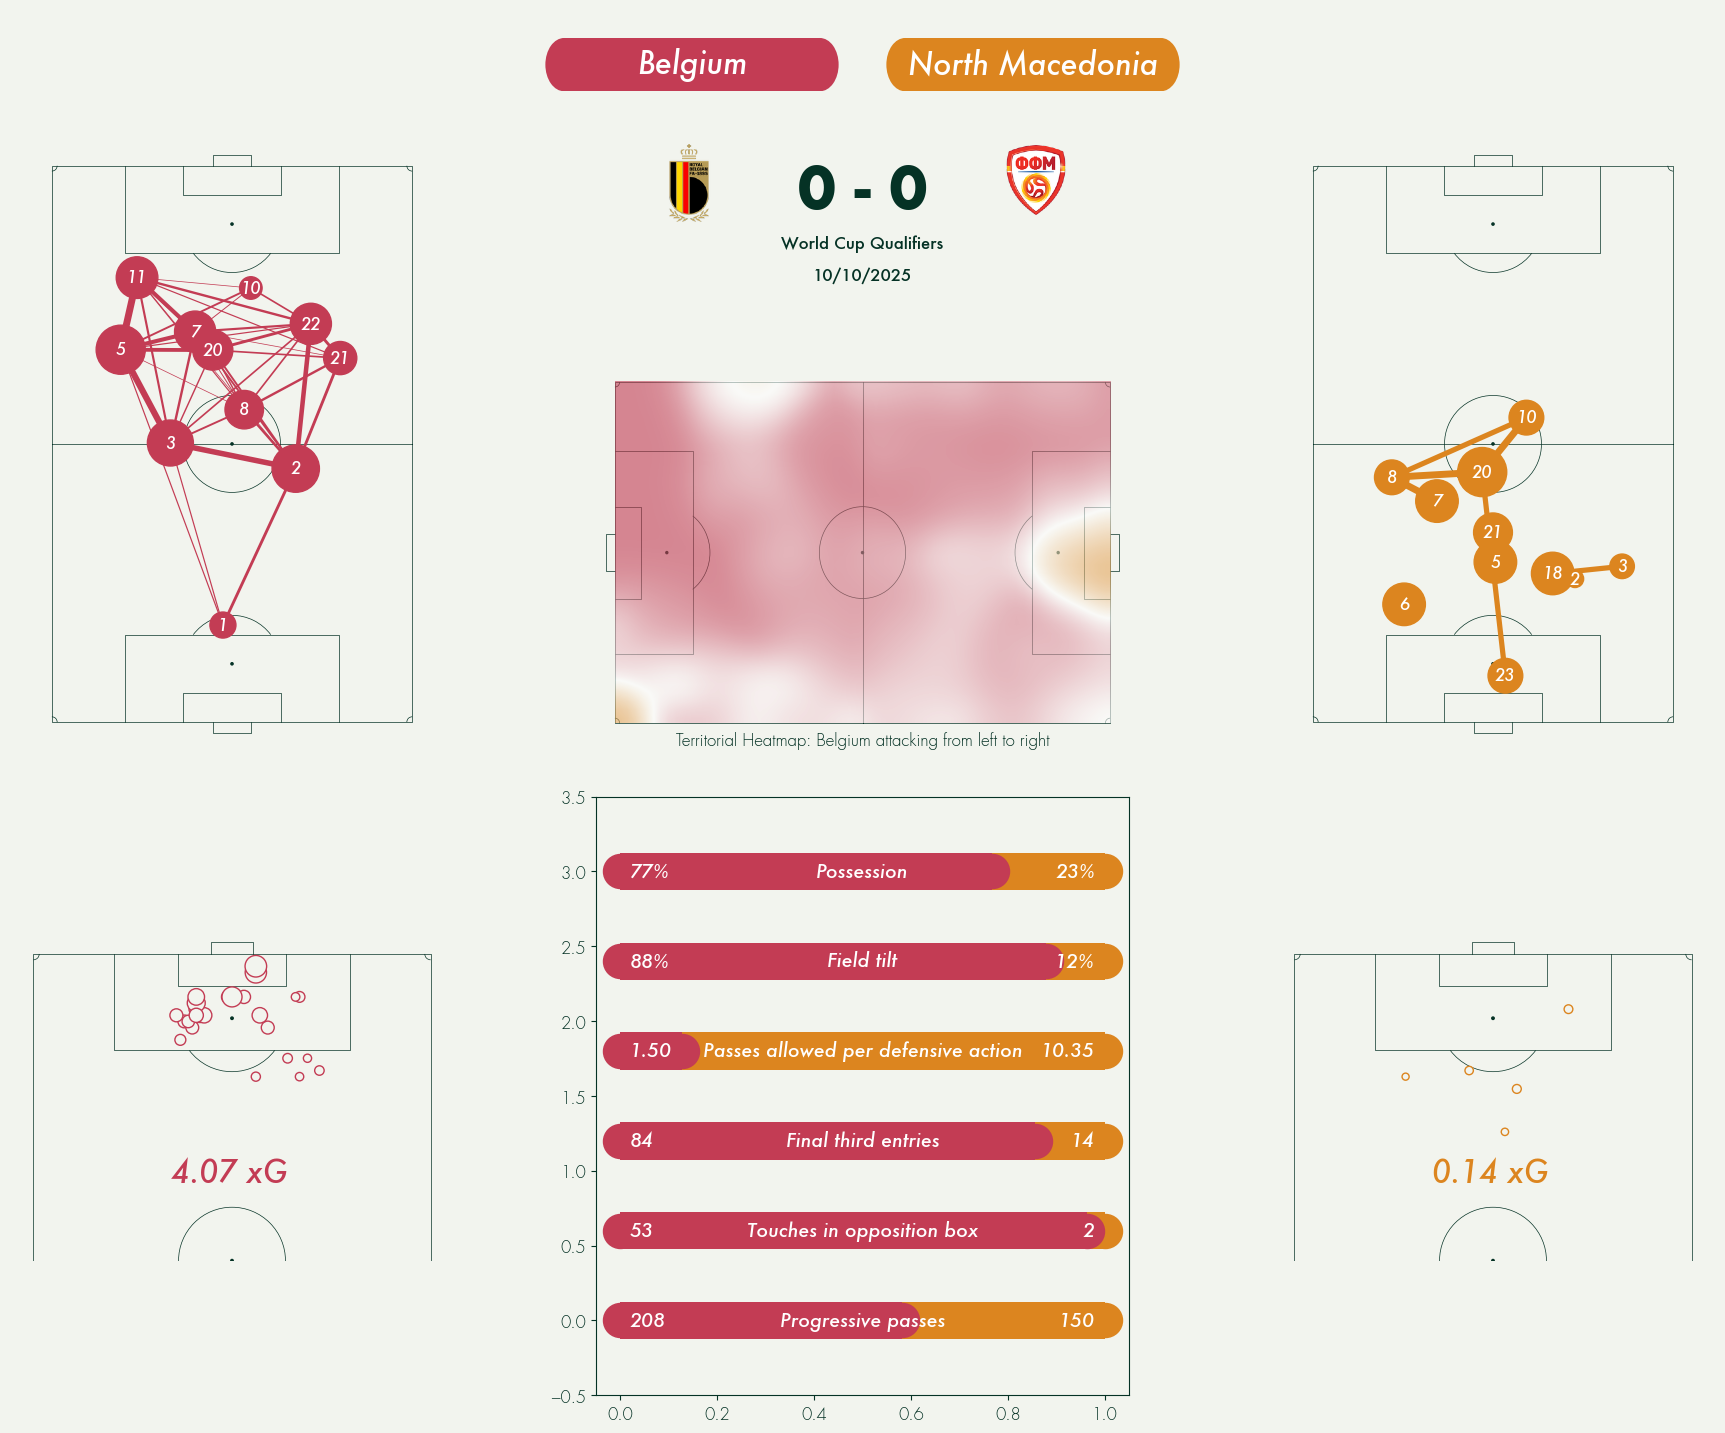

In [260]:
from viz import create_game_summary

fig = create_game_summary(events_data, player_data, "Belgium", "bel_color", "North Macedonia", "mkd_color", metrics_df)
fig.show()